In [2]:
import requests
import json
from config import api_key
import pandas as pd
import time

# created a list of the keywords to iterate over
kw = "Terrorism"

# created a list of begin dates to iterate over the beginning of each year
begin_dates = [20070101, 20080101, 20090101, 20100101, 20110101,
               20120101, 20130101, 20140101, 20150101, 20160101, 20170101]

# created a list of begin dates to iterate over the end of each year
end_dates = [20071231, 20081231, 20091231, 20101231, 20111231,
             20121231, 20131231, 20141231, 20151231, 20161231, 20171231]

In [16]:
# created an empty list to hold the responses
results = []

# jeff note: within each response, there could be a 'number of articles' parameter

# added source = revelance, to populate pg 1 with most 'revelant' articles to the keyword
for begin_date, end_date in zip(begin_dates, end_dates):
    
    # iterating through the first 10 pages of 'revelant' articles for each year, one keyword at a time
    for page in range(1, 11):

        try:
            url = 'https://api.nytimes.com/svc/search/v2/articlesearch.json?begin_date={}&end_date={}&q={}&sort=relevance&page={}&api-key={}'.format(begin_date, end_date,
                                                                                                                                                     kw, page, api_key)
            response = requests.get(url).json()

            # sleep requirement of 6 seconds between requests to avoid per min rate limit
            time.sleep(6)

            # printing each keyword and page it iterates through for confirmation
            print(f'{begin_date}-{end_date};  quering page #{page}...')

            # where the list of 'article' dicts begins
            for article in response['response']['docs']:

                # created column declaring the page # used to find that article
                article['page_nbr'] = page

                # jeff note: create column to declare the "hit_level" used to find that article
                # article['hits_level'] = # get the hits here

                # adds the article data created to the existing article data,
                # appends it to the empty 'results' list
                results.append(article)
        except:
            print(f'Page {page} for {kw} not found.')

20070101-20071231;  quering page #1...
20070101-20071231;  quering page #2...
20070101-20071231;  quering page #3...
20070101-20071231;  quering page #4...
20070101-20071231;  quering page #5...
20070101-20071231;  quering page #6...
20070101-20071231;  quering page #7...
20070101-20071231;  quering page #8...
20070101-20071231;  quering page #9...
20070101-20071231;  quering page #10...
20080101-20081231;  quering page #1...
20080101-20081231;  quering page #2...
20080101-20081231;  quering page #3...
20080101-20081231;  quering page #4...
20080101-20081231;  quering page #5...
20080101-20081231;  quering page #6...
20080101-20081231;  quering page #7...
20080101-20081231;  quering page #8...
20080101-20081231;  quering page #9...
20080101-20081231;  quering page #10...
20090101-20091231;  quering page #1...
20090101-20091231;  quering page #2...
20090101-20091231;  quering page #3...
20090101-20091231;  quering page #4...
20090101-20091231;  quering page #5...
20090101-20091231;  que

In [17]:
# created a df from the 'records' list of dicts with article data
df = pd.DataFrame.from_records(results)

df.head()
# what is the difference in "from_records" and "for_dict"??

,_id,abstract,blog,byline,document_type,headline,keywords,multimedia,news_desk,page_nbr,...,pub_date,score,section_name,slideshow_credits,snippet,source,type_of_material,uri,web_url,word_count
0,54872a5838f0d8164e21f59d,NaN,{},"{'original': 'By SARAH LYALL', 'person': [{'fi...",article,{'main': 'British Intelligence Chief Sharpens ...,"[{'name': 'glocations', 'value': 'Great Britai...","[{'rank': 0, 'subtype': 'xlarge', 'caption': N...",Foreign,1,...,2007-11-06T00:00:00Z,92.376130,Europe,NaN,"The official said that at least 2,000 people i...",The New York Times,News,NaN,https://www.nytimes.com/2007/11/06/world/europ...,963
1,5484444e38f0d80df4fa4e9e,NaN,{},"{'original': 'By AL BAKER and JOHN HOLUSHA', '...",article,{'main': 'Study Cites Danger of Homegrown Terr...,"[{'name': 'subject', 'value': 'Terrorism', 'ra...",[],ContinuousNews,1,...,2007-08-15T00:00:00Z,91.877750,NaN,NaN,The study by the New York Police Department co...,The New York Times,News,NaN,https://www.nytimes.com/2007/08/15/nyregion/15...,841
2,548db26638f0d80cddfa0f7e,NaN,{},"{'original': 'By CARLOS H. CONDE', 'person': [...",article,{'main': 'Southeast Asians Consider Pact Again...,"[{'name': 'subject', 'value': 'Terrorism', 'ra...",[],Foreign,1,...,2007-01-12T00:00:00Z,91.422290,Asia Pacific,NaN,Ten Southeast Asian countries are hammering ou...,The New York Times,News,NaN,https://www.nytimes.com/2007/01/12/world/asia/...,391
3,5490701138f0d847ca7e1c52,NaN,{},"{'original': 'By JODI RUDOREN', 'person': [{'f...",article,{'main': 'Connecticut: Indictment in Terrorism...,[],[],National,1,...,2007-03-22T00:00:00Z,90.759020,NaN,NaN,A former sailor was indicted on charges of mat...,The New York Times,Brief,NaN,https://www.nytimes.com/2007/03/22/us/22brfs-N...,86
4,5489444238f0d82a67123866,NaN,{},"{'original': 'By CARLOTTA GALL', 'person': [{'...",article,{'main': 'Pakistan Says Terrorism Suspect Has ...,"[{'name': 'glocations', 'value': 'Pakistan', '...",[],ContinuousNews,1,...,2007-12-17T00:00:00Z,90.646164,Asia Pacific,NaN,A man who was arrested in Pakistan last year o...,The New York Times,News,NaN,https://www.nytimes.com/2007/12/17/world/asia/...,901


In [18]:
# created an empty list to hold the new dates
formatted_date = []
formatted_year = []
formatted_month = []

# iterate over each published date in the df 
for date in df['pub_date']:
    
    # converted all pub dates from ints to strings
    date_string = str(date)
    
    # split the date to only contain YYYY-MM-DD
    new_date = date_string[:10]
    
    # split the year and month out from the date
    new_year = date_string[:4]
    new_month = date_string[5:7]
    
    # added new date/month/year to 'formatted date/year/month' list
    formatted_date.append(new_date)
    formatted_month.append(int(new_month))
    formatted_year.append(int(new_year))
    
# added the new date/month/year to the df
df['formatted_date'] = formatted_date
df['formatted_month'] = formatted_month
df['formatted_year'] = formatted_year


In [19]:
# used .map() and used lambda as the function to iterate through each
# row to capture the 'main' title

# created new column 'article title'...
df['article_title'] = df['headline'].map(lambda x: x['main'])

# ...made it equal to the 'main' title for each row


In [61]:
new_df = pd.DataFrame({
    "Page": df['page_nbr'],
    "Year": df['formatted_year'],
    "Month": df['formatted_month'],
    "Title": df['article_title'],
    "Date": df['formatted_date'],
    "URL": df['web_url'],
    
})

new_df.head(20)

,Page,Year,Month,Title,Date,URL
0,1,2007,11,British Intelligence Chief Sharpens Terrorism ...,2007-11-06,https://www.nytimes.com/2007/11/06/world/europ...
1,1,2007,8,Study Cites Danger of Homegrown Terrorism,2007-08-15,https://www.nytimes.com/2007/08/15/nyregion/15...
2,1,2007,1,Southeast Asians Consider Pact Against Terrorism,2007-01-12,https://www.nytimes.com/2007/01/12/world/asia/...
3,1,2007,3,Connecticut: Indictment in Terrorism Case,2007-03-22,https://www.nytimes.com/2007/03/22/us/22brfs-N...
4,1,2007,12,Pakistan Says Terrorism Suspect Has Escaped,2007-12-17,https://www.nytimes.com/2007/12/17/world/asia/...
5,1,2007,11,Australian Judge Dismisses Terrorism Case,2007-11-13,https://www.nytimes.com/2007/11/13/world/asia/...
6,1,2007,7,England: Terrorism Suspect Is Sentenced,2007-07-18,https://query.nytimes.com/gst/fullpage.html?re...
7,1,2007,7,British Leader Seeks New Terrorism Laws,2007-07-26,https://www.nytimes.com/2007/07/26/world/europ...
8,1,2007,4,Indonesia's Fight Against Terrorism,2007-04-12,https://www.nytimes.com/video/weekinreview/119...
9,1,2007,1,World Briefing | Europe: Britain: Terrorism Su...,2007-01-17,https://query.nytimes.com/gst/fullpage.html?re...


In [25]:
new_df.to_csv("NYT Terrorism Articles.csv")

In [75]:
articles_per_year = new_df.groupby(['Year','Month']).agg({"Title":"count"}).reset_index()

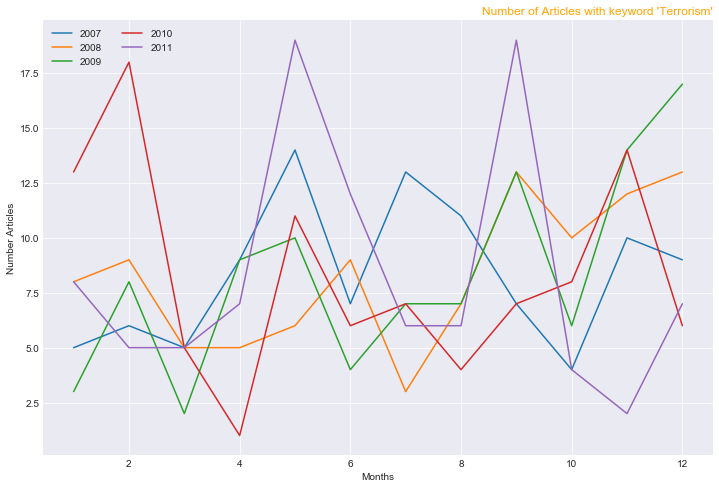

<Figure size 864x576 with 0 Axes>

In [135]:
# import plotly.plotly as py
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from pylab import rcParams
import pylab


# style
plt.style.use('seaborn-darkgrid')
rcParams['figure.figsize'] = 12, 8


# create a color palette
palette = plt.get_cmap('Set1')

for year in articles_per_year["Year"].unique()[0:5]:

    temp = articles_per_year[articles_per_year["Year"] == year]
    x = list(temp["Month"])
    y = list(temp["Title"])
    plt.plot(x, y, label=year)


# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Number of Articles with keyword 'Terrorism'",
          loc='right', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Months")
plt.ylabel("Number Articles")
plt.show()
# savefig('2007-2011.jpg')
pylab.savefig('test.png')

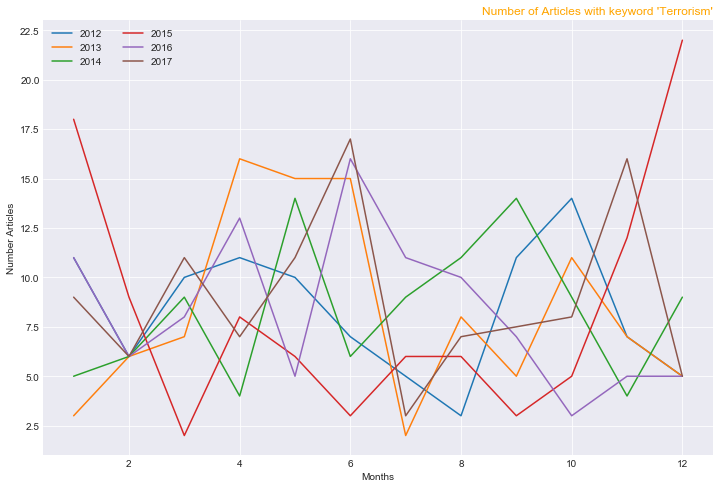

NameError: name 'savefig' is not defined

In [133]:
# style
plt.style.use('seaborn-darkgrid')
rcParams['figure.figsize'] = 12, 8

# create a color palette
palette = plt.get_cmap('Set1')

for year in articles_per_year["Year"].unique()[5:11]:

    temp = articles_per_year[articles_per_year["Year"] == year]
    x = list(temp["Month"])
    y = list(temp["Title"])
    plt.plot(x, y, label=year)


# Add legend
plt.legend(loc=2, ncol=2)

# Add titles
plt.title("Number of Articles with keyword 'Terrorism'",
          loc='right', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Months")
plt.ylabel("Number Articles")
plt.show()
savefig('2012-2017.png')